# **Практика 6. Описательные статистики. Пропуски и выбросы.**

[SmartLMS](https://edu.hse.ru/mod/quiz/view.php?id=1610940)

Вам предоставлен датасет по удовлетворенности пассажиров авиакомпании полетами. 

В данных представлена следующая информация о пассажирах: 

| Признак | Описание |
| --- | --- |
| `Gender` | Пол пассажира (**0** - женщина, **1** - мужчина) |
| `customer_type` | Тип клиента (**Loyal Customer** - постоянный, **disloyal Customer** - новый пассажир) |
| `age` | Возраст пассажира |
| `type_of_travel` | Цель путешествия (**Personal Travel** - отдых, **Business travel** - деловая поездка) |
| `customer_class` | Класс обслуживания (**Business** - бизнес, **Eco Plus** - эконом+, **Eco** - эконом) |
| `flight_distance` | Протяжённость полёта (км) |
| `departure_delay_in_minutes` | Продолжительность задержки отправления рейса (в минутах) |
| `satisfaction` | Удовлетворенность полетом |
| `ticket_price` | Цена билета на самолет |

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
import pandas as pd
df = pd.read_csv('data/air_data.csv')

In [111]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,departure_delay_in_minutes,satisfaction,ticket_price
0,1,Loyal Customer,13,Personal Travel,Eco Plus,460,NaN,3.857143,505.524795
1,1,NaN,25,Business travel,Business,235,1.0,2.285714,605.436333
2,0,Loyal Customer,25,Business travel,Business,562,11.0,3.000000,522.323303
3,1,Loyal Customer,47,Personal Travel,Eco,1276,9.0,2.785714,580.841223
4,0,Loyal Customer,52,Business travel,Business,2035,NaN,4.500000,531.221025


## **Задание 1**

>*Рассчитайте заданные описательные статистики. Численные ответы округлите до двух знаков.*
>* *Укажите чему равен усредненный квадрат отклонения от средней протяженности полета (`flight_distance`)*
>*   *Для пассажиров, которые летели в бизнес классе (**Business**; `customer_class`) по признаку `flight_distance` рассчитайте меру центральной тенденции, которая устойчива к выбросам*
>*   *Для самой популярной цели путешествия (`type_of_travel`) рассчитайте амплитуду разброса протяженности полета (`flight_distance`)*
>*   *Для новых пассажиров (**disloyal Customer**; `customer_type`) рассчитайте меру вариативности, которая устойчива к выбросам по признаку `flight_distance`*

In [112]:
# 1. усредненный квадрат отклонения от средней протяженности полета = дисперсия
print(df['flight_distance'].var().round(2))

# 2. МЦТ по `flight_distance` для пассажиров, летевших в бизнес-классе (медиана устойчива к выбросам)
print(df[df['customer_class'] == 'Business']['flight_distance'].median())

# 3. амплитуда разброса (=max - min) по `flight_distance` для самой популярной цели путешествия (моде)
pop_purpose = df['type_of_travel'].mode()[0]
df_pop_purpose = df[df['type_of_travel'] == pop_purpose]
print(df_pop_purpose['flight_distance'].max() - df_pop_purpose['flight_distance'].min())

# 4. IQR (мера разброса, устойчивая к выбросам) по `flight_distance` для новых пассажиров
df_cust_new = df[df['customer_type'] == 'disloyal Customer']
q1 = df_cust_new['flight_distance'].quantile(0.25)
q3 = df_cust_new['flight_distance'].quantile(0.75)
print(q3 - q1)

976458.61
1590.0
4927
629.0


---

## **Задание 2**

>*Постройте сводную таблицу, где по строкам идет класс обслуживания (`customer_class`), в столбце интерквартильный размах протяженности полета (`flight_distance`). Укажите для какого класса обслуживания (`customer_class`) интерквартильный размах протяженности полета наименьший.*

In [113]:
customer_group_df = df.groupby('customer_class')['flight_distance'].quantile([0.25, 0.75]).unstack()
customer_group_df

,0.25,0.75
customer_class,,
Business,624.0,2555.00
Eco,371.0,1005.00
Eco Plus,363.0,997.75


In [114]:
customer_group_df['iqr'] = customer_group_df[0.75] - customer_group_df[0.25]

# первая строчка - с наименьшим IQR, нам нужен индекс (имя)
customer_group_df.sort_values('iqr')

,0.25,0.75,iqr
customer_class,,,
Eco,371.0,1005.00,634.00
Eco Plus,363.0,997.75,634.75
Business,624.0,2555.00,1931.00


**Ответ:** Eco	

---

## **Задание 3**

>*Создайте новый признак `satisfaction_cat` на основе признака `satisfaction`:*
>- *Если `satisfaction` меньше значения первого квартиля, вернуть **dissatisfied***
>- *Если `satisfaction` меньше значения второго квартиля, вернуть **adequate***
>- *Если `satisfaction` меньше значения третьего квартиля, вернуть **satisfied***
>- *Во всех остальных случаях вернуть **delighted***

In [115]:
def code_satisfaction(x, q1, q2, q3):
    if x < q1:
        return 'dissatisfied'
    elif q1 <= x < q2:
        return 'adequate'
    elif q2 <= x < q3:
        return 'satisfied'
    else:
        return 'delighted'

q1 = df['satisfaction'].quantile(0.25)
q2 = df['satisfaction'].quantile(0.50)
q3 = df['satisfaction'].quantile(0.75)

df['satisfaction_cat'] = df['satisfaction'].apply(lambda x: code_satisfaction(x, q1, q2, q3))

In [116]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,departure_delay_in_minutes,satisfaction,ticket_price,satisfaction_cat
0,1,Loyal Customer,13,Personal Travel,Eco Plus,460,NaN,3.857143,505.524795,delighted
1,1,NaN,25,Business travel,Business,235,1.0,2.285714,605.436333,dissatisfied
2,0,Loyal Customer,25,Business travel,Business,562,11.0,3.000000,522.323303,adequate
3,1,Loyal Customer,47,Personal Travel,Eco,1276,9.0,2.785714,580.841223,adequate
4,0,Loyal Customer,52,Business travel,Business,2035,NaN,4.500000,531.221025,delighted


>*Постройте сводную таблицу где по строкам располагается уровень удовлетворенности полетом (`satisfaction_cat`), а в столбцах среднее, медиана и стандартное отклонение цены билеты (`ticket_price`) для каждого уровня удовлетворенности.*
>
>*Отметьте верные утверждения на основе полученной сводной таблицы.*
>- *Среди тех кто оценил обслуживание как приемлемое (**adequate**; `satisfaction_cat`) есть пассажиры, которые заплатили за билет экстремально низкую цену (`ticket_price`)*
>- *Среди тех кто в восторге от обслуживания (**delighted**; `satisfaction_cat`) есть пассажиры, которые заплатили за билет экстремально высокую цену (`ticket_price`)*
>- *Среди тех кто не удовлетворен обслуживанием (**dissatisfied**; `satisfaction_cat`) есть пассажиры, которые заплатили за билет экстремально высокую цену (`ticket_price`)*
>- *Наибольшая вариативность цены билета (`ticket_price`) наблюдается среди тех, кто удовлетворен обслуживанием (**satisfied**; `satisfaction_cat`)*

In [117]:
df.groupby('satisfaction_cat')['ticket_price'].agg(['mean', 'median', 'std'])

,mean,median,std
satisfaction_cat,,,
adequate,499.953225,500.146067,80.049346
delighted,468.676342,536.772154,167.394293
dissatisfied,598.830166,503.680545,395.145879
satisfied,499.679707,499.430357,49.332362


**Ответ**:

- Среди тех кто оценил обслуживание как приемлемое (**adequate**; `satisfaction_cat`) есть пассажиры, которые заплатили за билет экстремально низкую цену (`ticket_price`) - <font color='red'>**нет, так как медиана примерно равна среднему**</font>
- Среди тех кто в восторге от обслуживания (**delighted**; `satisfaction_cat`) есть пассажиры, которые заплатили за билет экстремально высокую цену (`ticket_price`)- <font color='red'>**нет, так как медиана больше среднего, т.е. наоборот есть пассажиры, заплатившие экстремально низкую цену**</font>
- Среди тех кто не удовлетворен обслуживанием (**dissatisfied**; `satisfaction_cat`) есть пассажиры, которые заплатили за билет экстремально высокую цену (`ticket_price`) - <font color='green'>**да, т.к. среднее больше медианы**</font>
- Наибольшая вариативность цены билета (`ticket_price`) наблюдается среди тех, кто удовлетворен обслуживанием (**satisfied**; `satisfaction_cat`)- <font color='red'>**наибольшая вариативность у dissatisfied**</font>

---

## **Задание 4**

>*Для количественного признака из данных, имеющего наиболее симметричное куполообразное распределение, рассчитайте границы выбросов по критерию 2xSTD. В ответ укажите количество наблюдений после удаления выбросов.*
>
>*Таблицу без выбросов сохраните в переменную `temp`. Далее в заданиях вы работаете с этой таблицей.*

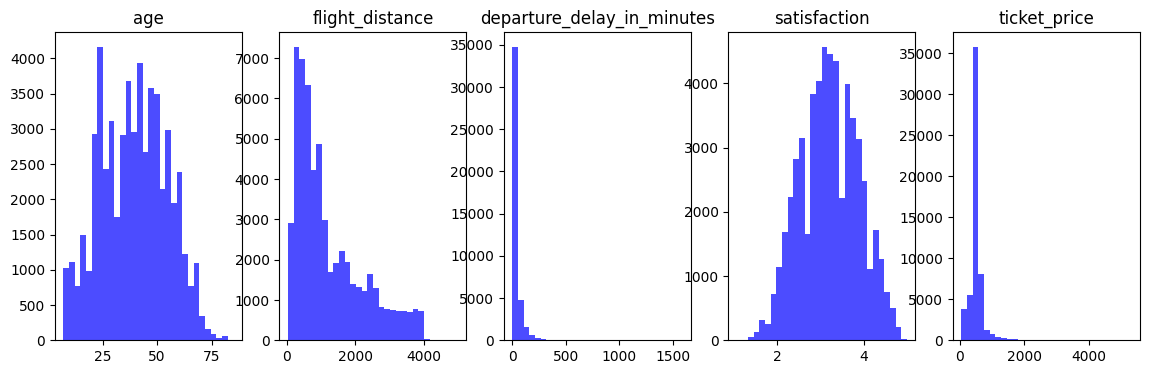

In [118]:
# ищем наиболее симметричное распределение, например построив гистограммы
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(14, 4))

# у нас 5 количественных признаков
numeric_features = ['age', 'flight_distance', 'departure_delay_in_minutes', 'satisfaction', 'ticket_price']

for i, feature in enumerate(numeric_features):
    axs[i].hist(df[feature], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(feature)

У нас наиболее "куполообразное" (нормальное) распределение имеет `satisfaction`

In [119]:
left_border = df['satisfaction'].mean() - 2 * df['satisfaction'].std()
right_border = df['satisfaction'].mean() + 2 * df['satisfaction'].std()

# можно так:
# temp = df[(df['satisfaction'] > left_border) & (df['satisfaction'] < right_border)]
# или так:
temp = df[df['satisfaction'].between(left_border, right_border)]
print(temp.shape[0])

54096


---

## **Задание 5**

>*Рассчитайте основные значения ящика с усами для признака `age`. Ответы округлите до двух знаков.*

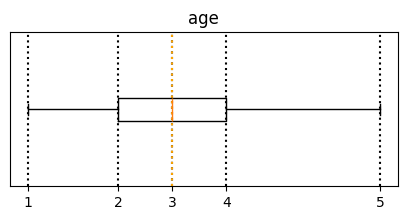

In [120]:
# 1 - min
print(temp['age'].min())

# 2 - 25th percentile = Q1
print(temp['age'].quantile(0.25))

# 3 - median
print(temp['age'].median())

# 4 - 75th percentile = Q3
print(temp['age'].quantile(0.75))

# 5 - max
print(temp['age'].max())

7
27.0
39.0
51.0
85


---

## **Задание 6**

>*Отметьте верное утверждения на основе ящика с усами по признаку возраст (`age`):*
>- *75% пассажиров старше 27 лет*
>- *25% пассажиров моложе 7 лет*
>- *50% пассажиров моложе 85 лет*
>- *Любой пассажир моложе 27 лет считается выбросом*

**Ответ**
- *75% пассажиров старше 27 лет* - <font color='green'>**да, так как это определение первого квартиля**</font>
- *25% пассажиров моложе 7 лет* - <font color='red'>**нет, 7 лет это минимум**</font>
- *50% пассажиров моложе 85 лет* - <font color='red'>**нетт, 85 лет это максимум**</font>
- *Любой пассажир моложе 27 лет считается выбросом* - <font color='red'>**нет, 27 лет это медиана. выбросом бы считался пассажир, который моложе q1 - 1.5 * iqr**</font>

---

## **Задание 7**

>*Рассчитайте основные значения ящика с усами для признака `flight_distance`. Ответы округлите до двух знаков.*

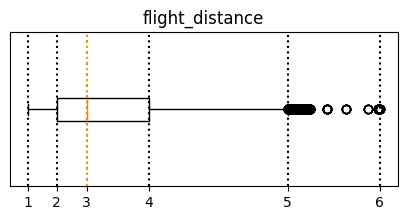

In [121]:
# 1 - min
print(temp['flight_distance'].min())

# 2 - 25th percentile = Q1
print(temp['flight_distance'].quantile(0.25))

# 3 - median
print(temp['flight_distance'].median())

# 4 - 75th percentile = Q3
print(temp['flight_distance'].quantile(0.75))

# 5 - q3 + 1.5 * iqr
iqr = temp['flight_distance'].quantile(0.75) - temp['flight_distance'].quantile(0.25)
print(temp['flight_distance'].quantile(0.75) + 1.5 * iqr)

# 6 - max
print(temp['flight_distance'].max())

31
438.0
861.0
1737.0
3685.5
4983


---

## **Задание 8**

>*Отметьте **не**верное утверждение на основе ящика с усами по признаку протяженность полета (`flight_distance`)*
>- *Половина полетов короче 861 км*
>- *Любой полет длиннее 3685.5 км считается выбросом*
>- *Средняя протяженность полета меньше медианного значения*
>- *25% полетов короче 438 км*

**Ответ**:
- *Половина полетов короче 861 км* - <font color='red'>**да, это медиана**</font>
- *Любой полет длиннее 3685.5 км считается выбросом* - <font color='red'>**да, ведь это граница 1.5 IQR + Q3**</font>
- *Средняя протяженность полета меньше медианного значения* - <font color='green'>**нет, ведь есть выбросы справа (экстремально больше значения), которые сделают среднее больше медианы**</font>
- *25% полетов короче 438 км* - <font color='red'>**да, это Q1**</font>

---

## **Задание 9**

>*Удалите выбросы по признаку `flight_distance` по критерию 1.5xIQR. В ответ укажите сколько наблюдений оказалось выбросами согласно этому критерию*
>
>*Таблицу без выбросов сохраните в переменную `df_clean`. Далее в заданиях вы будете работать с ней.*

In [122]:
q1 = temp['flight_distance'].quantile(0.25)
q3 = temp['flight_distance'].quantile(0.75)
left_border = q1 - 1.5 * (q3 - q1)
right_border = q3 + 1.5 * (q3 - q1)

df_clean = temp[temp['flight_distance'].between(left_border, right_border)]
print(temp.shape[0] - df_clean.shape[0])

1410


---

## **Задание 10**

>*В данных есть два признака с пропусками. Укажите:*
>- *количество пропусков в каждом*
>- *процент пропусков* (Округлите до двух знаков. Пример ответа: 12.25)
> 
> | ПРИЗНАК	 | КОЛИЧЕСТВО ПРОПУСКОВ |	 ПРОЦЕНТ  ПРОПУСКОВ | 
> | --- | --- | --- | 
> | `customer_type` | 	| | 
> | `departure_delay_in_minutes` | | | 

In [123]:
df_clean[['customer_type', 'departure_delay_in_minutes']].isna().sum()

customer_type                 10702
departure_delay_in_minutes    13038
dtype: int64

In [124]:
df_clean[['customer_type', 'departure_delay_in_minutes']].isna().mean() * 100

customer_type                 20.312797
departure_delay_in_minutes    24.746612
dtype: float64

**Ответ**

| ПРИЗНАК	 | КОЛИЧЕСТВО ПРОПУСКОВ |	 ПРОЦЕНТ  ПРОПУСКОВ | 
| --- | --- | --- | 
| `customer_type` | 10702	| 20.31 | 
| `departure_delay_in_minutes` | 13038 | 24.75 | 

---

## **Задание 11**

>*В признаке `departure_delay_in_minutes`, замените NaN на подходящую меру центральной тенденции. После замены пропусков, рассчитайте для него описательную статистику, которая показывает усредненное отклонение данных от среднего арифметического. Ответ округлите до двух знаков.*

In [125]:
# departure_delay_in_minutes имеет ненорм распределение -> заменяем на медиану
dep_med = df_clean['departure_delay_in_minutes'].median()
df_clean['departure_delay_in_minutes'].fillna(dep_med, inplace=True)

# усреденнное отклонение данных от среднего = стандартное отконение
df_clean['departure_delay_in_minutes'].std().round(2)

np.float64(46.27)

---

## **Задание 12**

>*В признаке `customer_type`, замените NaN на подходящую меру центральной тенденции. После замены пропусков, укажите процент новых пассажиров (**disloyal Customer**; `customer_type`) в данных. Ответ округлите до двух знаков.*

In [126]:
# customer_type - категориальный признак -> заменяем на моду
type_mode = df_clean['customer_type'].mode()[0]
df_clean['customer_type'].fillna(type_mode, inplace=True)

# % новых пассажиров
((df_clean['customer_type'] == 'disloyal Customer').mean() * 100).round(2)

np.float64(15.34)